In [1]:
# Importing required modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans

In [4]:
def display_color_palette(cluster_centroids, num_clusters):
    """
    Function to display the color palette of the quantized image clusters.

    Parameters:
    - cluster_centroids: The RGB color codes representing the center of each cluster.
    - num_clusters: The number of clusters used for quantization (i.e., the number of colors).
    """
    # Reshape the cluster centroids to add an extra dimension for plotting
    color_palette = np.expand_dims(cluster_centroids, axis=0)

    # Create an array of indices for labeling each color in the palette
    color_indices = np.arange(0, len(cluster_centroids))

    # Set the figure size for displaying the color palette
    plt.figure(figsize=(num_clusters, num_clusters))

    # Set the x-axis to show the cluster indices and remove y-axis ticks
    plt.xticks(color_indices)
    plt.yticks([])

    # Display the color palette as an image
    plt.imshow(color_palette)
    plt.show()


In [5]:
def quantize_image(image_path, num_clusters):
    """
    Function to perform image quantization using K-Means clustering.

    Parameters:
    - image_path: Path to the image that should be quantized.
    - num_clusters: The number of clusters to reduce the image colors to.
    """
    # Read the image file
    image = mpimg.imread(image_path)

    # Reshape the image into a 2D array where each row represents a pixel with RGB values
    image_reshaped = image.reshape(image.shape[0] * image.shape[1], image.shape[2])

    # Initialize the KMeans model with the specified number of clusters
    kmeans_model = KMeans(n_clusters=num_clusters)

    # Fit the model to the reshaped image data
    kmeans_model.fit(image_reshaped)

    # Get the cluster centroids
    cluster_centroids = np.round(kmeans_model.cluster_centers_).astype(int)

    # Display the color palette of the quantized colors
    display_color_palette(cluster_centroids, num_clusters)

    # Assign each pixel to the closest cluster centroid based on the trained KMeans model
    pixel_labels = kmeans_model.predict(image_reshaped)

    # Reconstruct the quantized image by mapping each pixel to its nearest cluster centroid
    quantized_image = np.reshape(cluster_centroids[pixel_labels], (image.shape[0], image.shape[1], image.shape[2]))

    # Display the quantized (reduced-color) image
    plt.imshow(quantized_image)
    plt.show()


ORIGINAL IMAGE: 



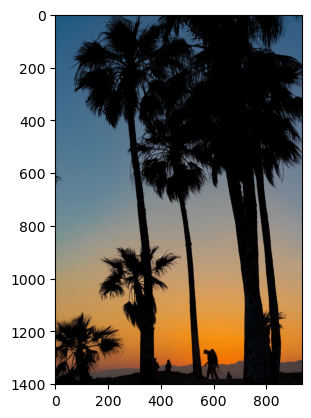



PROCESSED IMAGE: 



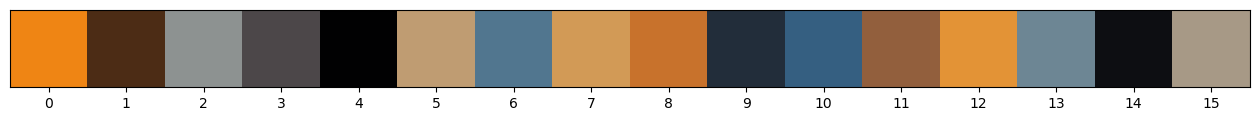

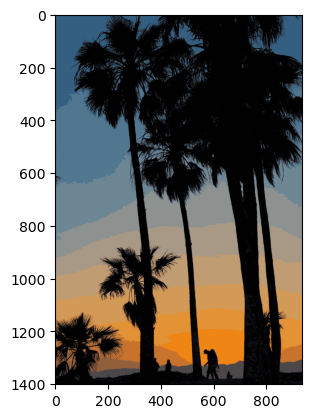

In [6]:
# Name of the files
file_name = './Images/palm_trees.jpg'
num_clusters = 16

print("ORIGINAL IMAGE: \n")
plt.imshow(mpimg.imread(file_name))
plt.show()

print('\n\nPROCESSED IMAGE: \n')
quantize_image(image_path = file_name, num_clusters = num_clusters)